## Scatterplots

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the **scatterplot**. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

**matplotlib.pyplot.scatter()**

One basic way of creating a scatterplot is through Matplotlib's [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function:

### Example 1 a. Scatter plot showing negative correlation between two variables

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

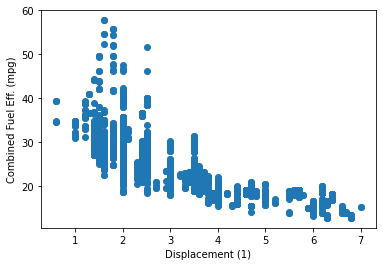

In [2]:
# TO DO: Necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(10)

# Scatter plot
plt.scatter(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')


In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

**Alternative Approach - seaborn.regplot()**

Seaborn's [`regplot()`](https://seaborn.pydata.org/generated/seaborn.regplot.html) function combines scatterplot creation with regression function fitting:

### Example 1 b. Scatter plot showing negative correlation between two variables

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

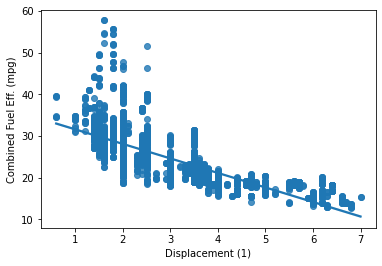

In [3]:
sb.regplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

The basic function parameters, "data", "x", and "y" are the same for `regplot` as they are for matplotlib's `scatter`.

### Example 2. Scatter plot showing a positive correlation between two variables

Let's consider another plot shown below that shows a positive correlation between two variables.

<img src="assets/regplot.png" width=400px>

In the scatter plot above, by default, the regression function is linear and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a $\text{log}(y) \propto x$ relationship (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set `fit_reg = False` in the `regplot` function call.

You can even plot the regression line on the transformed data as shown in the example below. For transformation, use a similar approach as you've learned in the last lesson.

### Example 3. Plot the regression line on the transformed data

C:\Users\myesi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


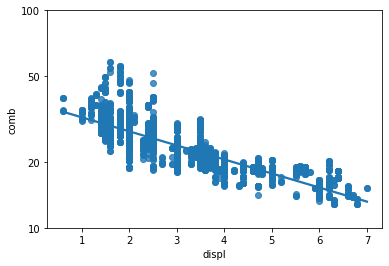

In [4]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)


sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

**Note** - In this example, the x- and y- values sent to `regplot` are set directly as Series, extracted from the dataframe.